<a href="https://colab.research.google.com/github/Vp2008a/zomato_analysis/blob/main/Zomato_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#importing data
df = pd.read_csv('Zomatodata .csv')

In [ ]:
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [ ]:
#data cleaning
df['rate']=df['rate'].str.split('/').str.get(0)

df['rate']=df['rate'].astype(float)

In [ ]:
df.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [ ]:
df.rename(columns={'listed_in(type)':'restraurant_type'}, inplace=True)

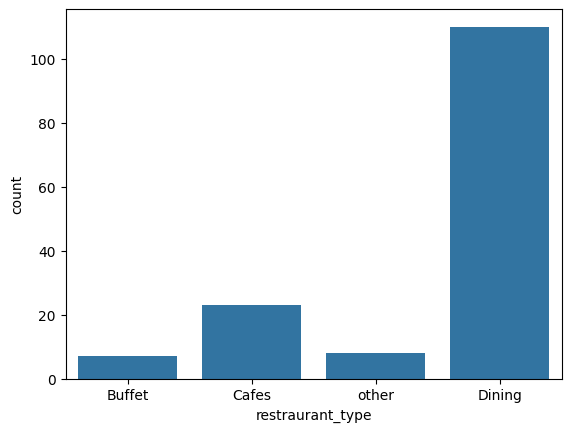

In [ ]:
sns.countplot(x=df['restraurant_type'])
plt.xlabel('restraurant_type')
plt.ylabel('count')
plt.show()


**Majority of the resturant falls in dinning category**

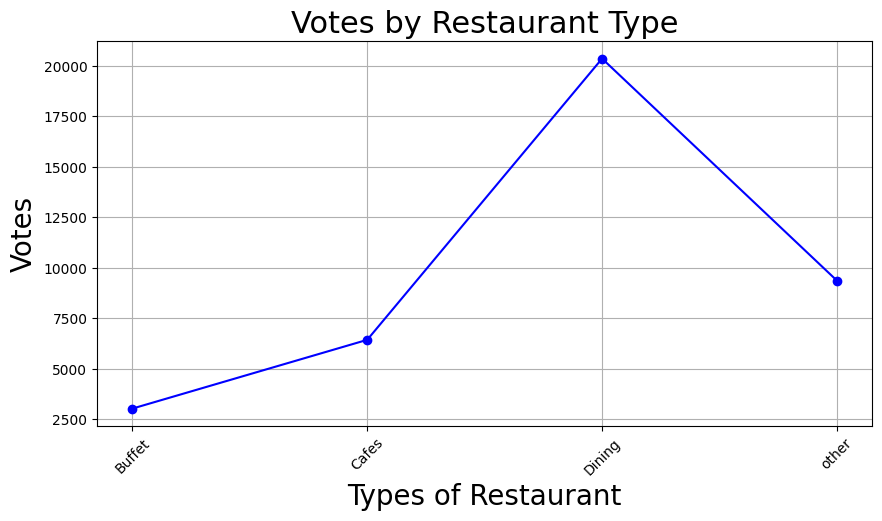

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping and summing votes
groupdata = df.groupby(['restraurant_type'])['votes'].sum().reset_index()

# Plot the line chart
plt.figure(figsize=(10, 5))
plt.plot(groupdata['restraurant_type'], groupdata['votes'], marker='o', linestyle='-', color='b')

# Labels and title
plt.xlabel("Types of Restaurant", size=20)
plt.ylabel("Votes", size=20)
plt.title("Votes by Restaurant Type", size=22)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.grid(True)  # Add grid for better readability
plt.show()


Text(0, 0.5, 'count')

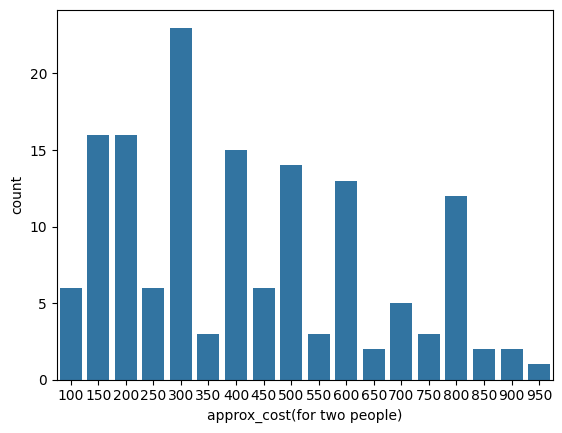

In [ ]:
# Average order spending
couple_data= df['approx_cost(for two people)']
sns.countplot(x=couple_data)
plt.xlabel('approx_cost(for two people)')
plt.ylabel('count')

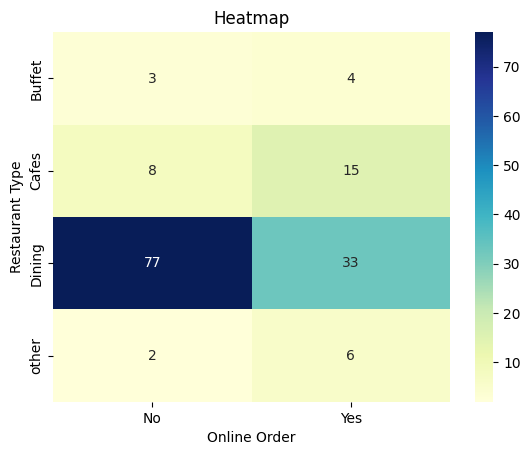

In [ ]:
pivot_table = df.pivot_table(index='restraurant_type', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Restaurant Type")

plt.show()

**CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer 1  orders in person at restaurants, but prefer online ordering at cafes**